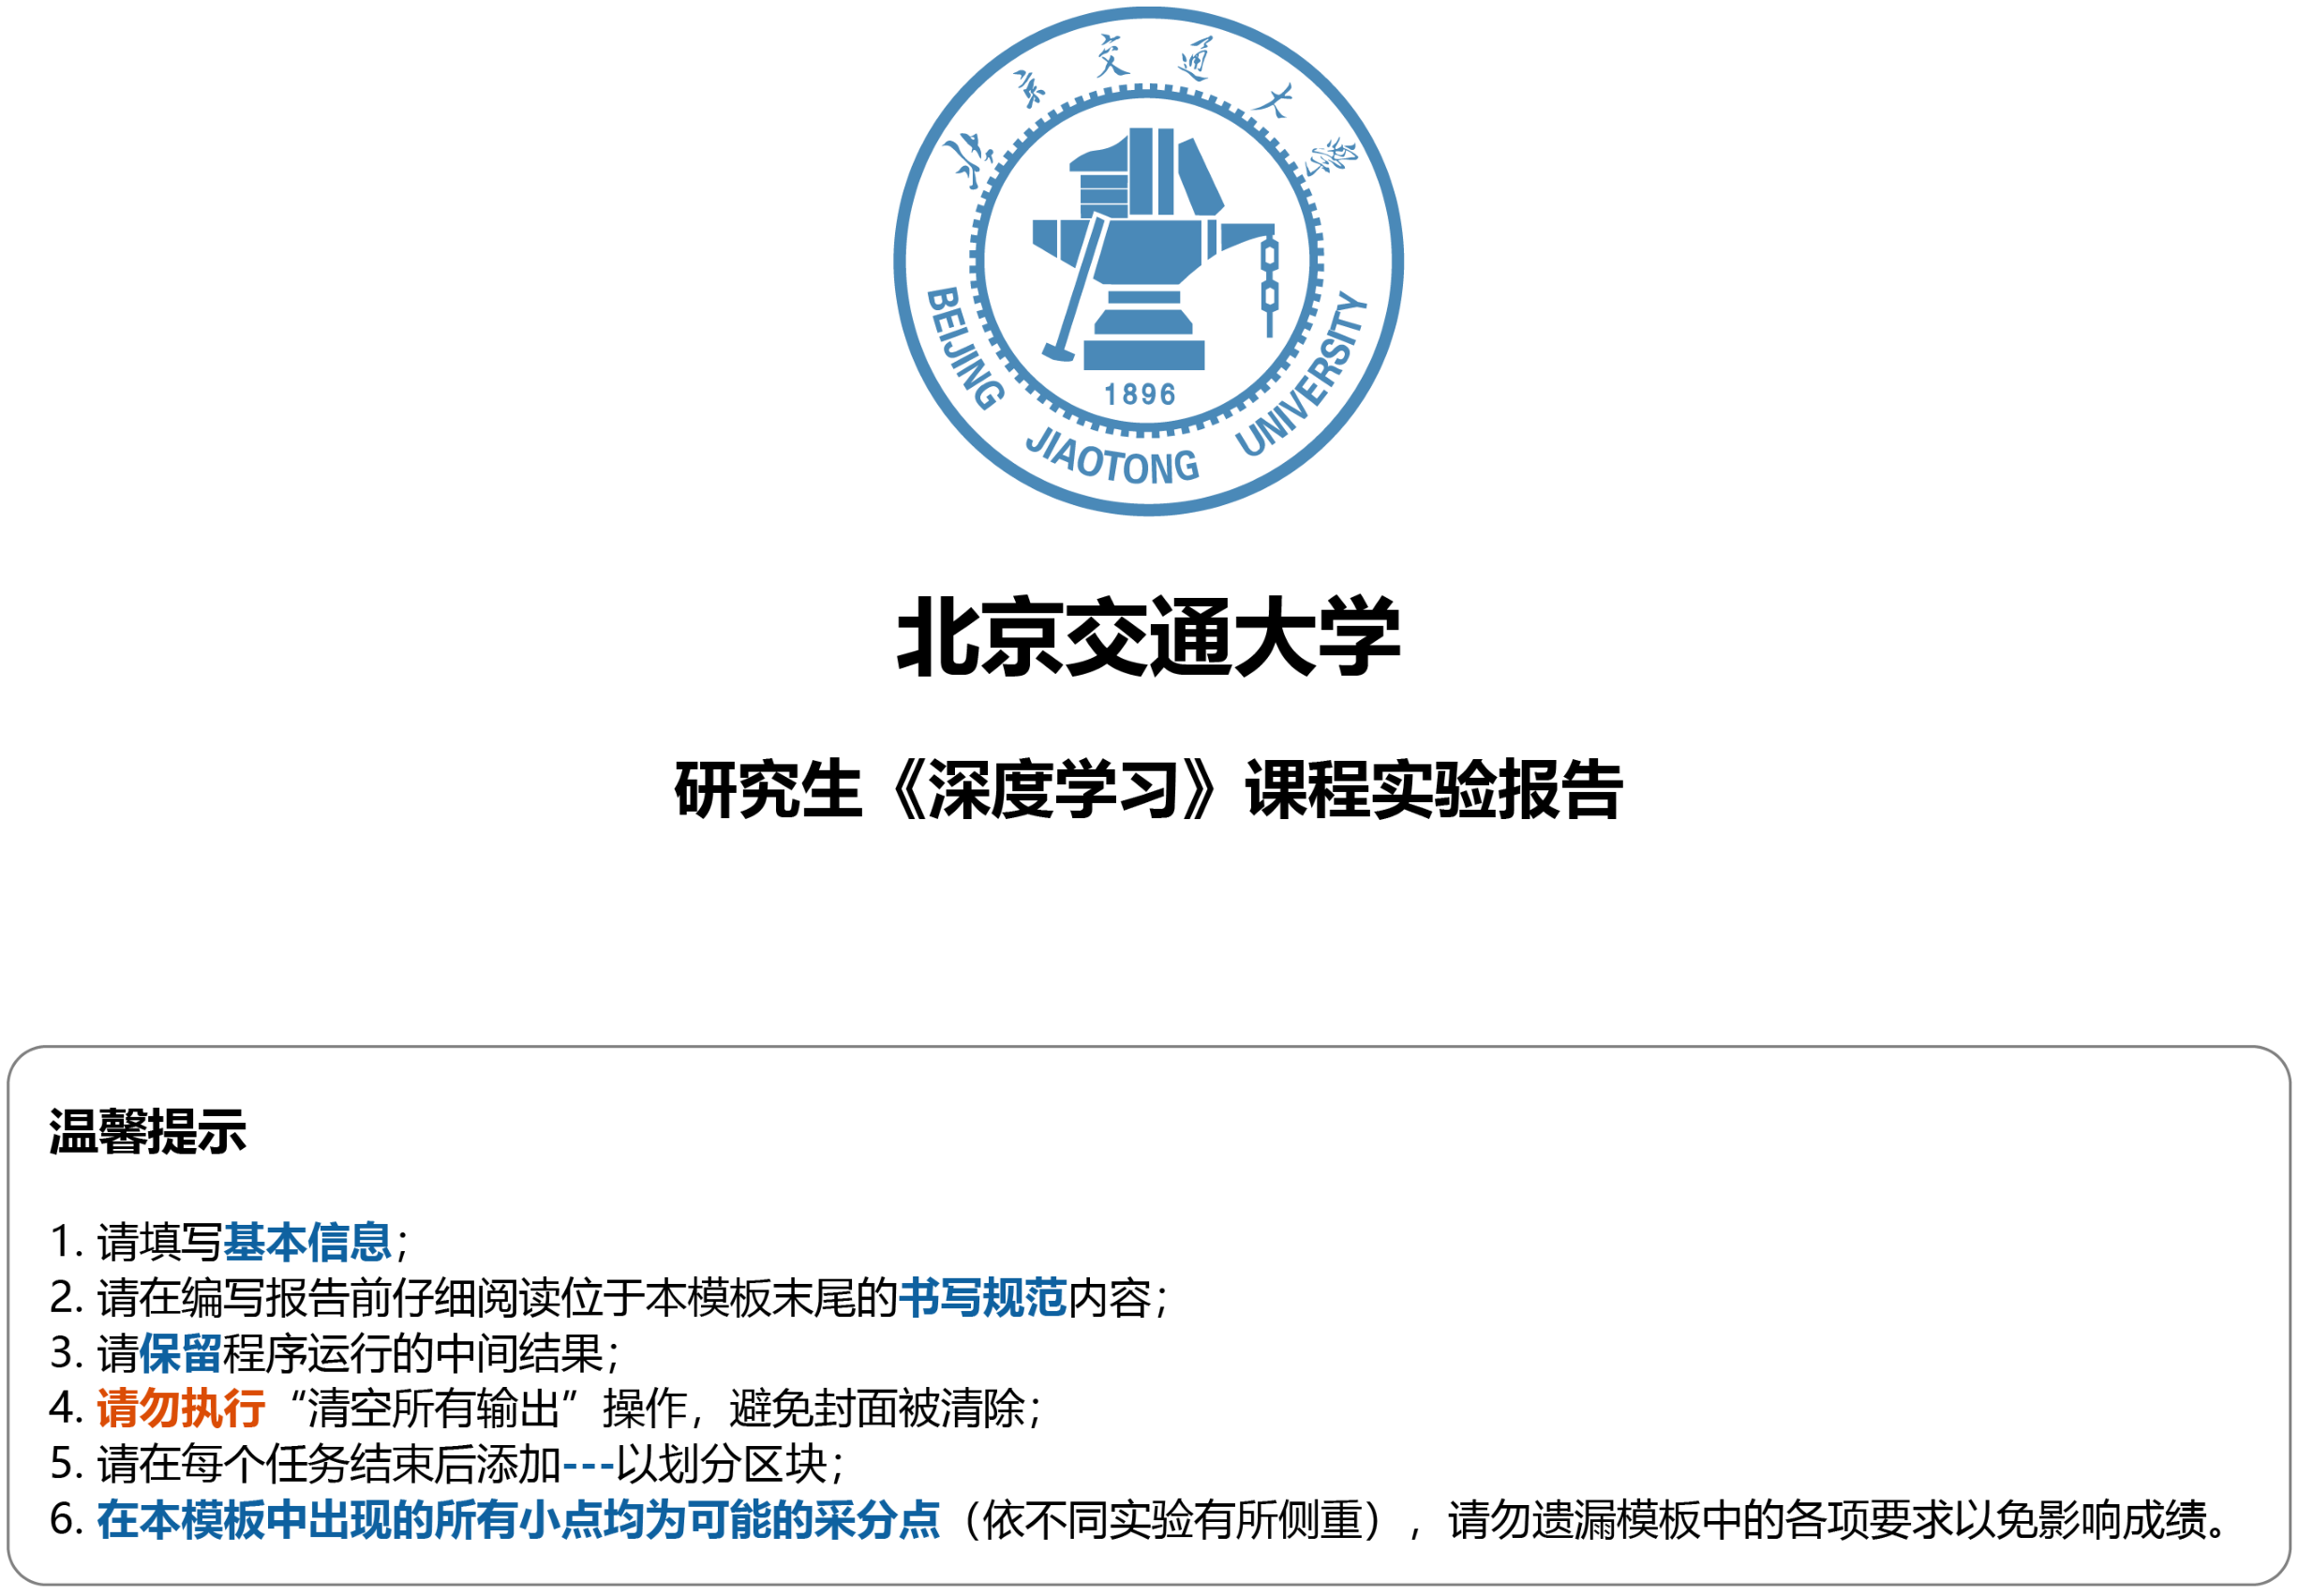

# 基本信息
1. 实验名称：前馈神经网络
2. 姓名：龙硕
3. 学号：21281165
4. 日期：10.28

---

# 一、任务1

## 1.1 任务内容

1. 手动实现前馈神经网络解决上述回归、二分类、多分类任务
2. 在多分类实验的基础上使用至少三种不同的激活函数

## 1.2 任务思路及代码


1. 步骤1：生成数据集
2. 步骤2：模型训练
3. 步骤3：绘制图表

训练集 X 维度: (7000, 500)
测试集 X 维度: (3000, 500)
Epoch 1/20, Loss: 206.8204
Epoch 2/20, Loss: 809.8054
Epoch 3/20, Loss: 2914.7698
Epoch 4/20, Loss: 7054.5825
Epoch 5/20, Loss: 7904.8979
Epoch 6/20, Loss: 2774.5725
Epoch 7/20, Loss: 218.0906
Epoch 8/20, Loss: 6.1825
Epoch 9/20, Loss: 4.2022
Epoch 10/20, Loss: 4.1577
Epoch 11/20, Loss: 4.1325
Epoch 12/20, Loss: 4.1079
Epoch 13/20, Loss: 4.0835
Epoch 14/20, Loss: 4.0595
Epoch 15/20, Loss: 4.0357
Epoch 16/20, Loss: 4.0122
Epoch 17/20, Loss: 3.9890
Epoch 18/20, Loss: 3.9661
Epoch 19/20, Loss: 3.9434
Epoch 20/20, Loss: 3.9210


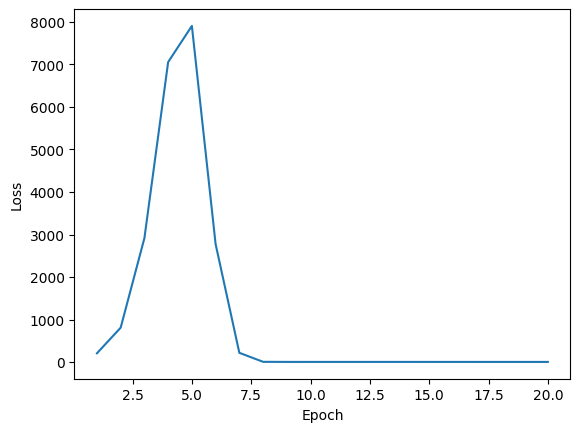

In [5]:
# 回归
import torch
import numpy as np
import matplotlib.pyplot as plt

# Generate your regression dataset (X, y) here
from sklearn.model_selection import train_test_split

# 设置随机种子以确保可重复性
np.random.seed(0)

# 生成特征矩阵 X，大小为 (10000, 500)
n_samples = 10000
n_features = 500
X = np.random.rand(n_samples, n_features)

# 生成噪声项 E，假设服从均值为0、标准差为1的正态分布
E = np.random.normal(0, 1, n_samples)

# 计算目标值 y，根据给定线性函数 y = 0.028 + 0.056 * X_i + E
# 其中，X_i 为特征矩阵 X 的第 i 列特征
y = 0.028 + 0.056 * X[:, 0] + E

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 打印数据集维度
print("训练集 X 维度:", X_train.shape)
print("测试集 X 维度:", X_test.shape)



# Convert data to PyTorch tensors
X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).float()
X_test = torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test).float()

# Define a custom neural network for regression
class RegressionNet:
    def __init__(self, input_dim, hidden_dim, output_dim, learning_rate):
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim
        self.learning_rate = learning_rate

        # Initialize weights and biases
        self.W1 = torch.randn(self.input_dim, self.hidden_dim, requires_grad=True)
        self.b1 = torch.zeros(1, self.hidden_dim, requires_grad=True)
        self.W2 = torch.randn(self.hidden_dim, self.output_dim, requires_grad=True)
        self.b2 = torch.zeros(1, self.output_dim, requires_grad=True)

    def sigmoid(self, x):
        return 1 / (1 + torch.exp(-x))

    def forward(self, X):
        self.z1 = torch.matmul(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)
        self.z2 = torch.matmul(self.a1, self.W2) + self.b2
        self.output = self.z2
        return self.output

    def calculate_loss(self, y_pred, y_true):
        return torch.mean((y_pred - y_true) ** 2)

    def backward(self, X, y, y_pred):
        optimizer = torch.optim.SGD([self.W1, self.b1, self.W2, self.b2], lr=self.learning_rate)
        loss = self.calculate_loss(y_pred, y)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    def train(self, X, y, num_epochs):
        train_losses = []
        for epoch in range(num_epochs):
            y_pred = self.forward(X)
            loss = self.calculate_loss(y_pred, y)
            self.backward(X, y, y_pred)
            train_losses.append(loss.item())
            print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}')
        return train_losses

# Initialize and train the custom regression network
input_dim = n_features
hidden_dim = 256
output_dim = 1
learning_rate = 0.01
num_epochs = 20

regression_model = RegressionNet(input_dim, hidden_dim, output_dim, learning_rate)
train_losses = regression_model.train(X_train, y_train, num_epochs)

# Plot the loss curve
plt.plot(range(1, num_epochs + 1), train_losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()



合并后的训练集 X 维度: (14000, 200)
合并后的测试集 X 维度: (6000, 200)
Epoch 1, Loss: 5.029481308849713e-28
Epoch 2, Loss: 1.9721522630525295e-29
Epoch 3, Loss: 7.099748146989106e-30
Epoch 4, Loss: 3.1554436208840472e-30
Epoch 5, Loss: 1.232595164407831e-30
Epoch 6, Loss: 4.437342591868191e-31
Epoch 7, Loss: 1.9721522630525295e-31
Epoch 8, Loss: 1.9721522630525295e-31
Epoch 9, Loss: 4.930380657631324e-32
Epoch 10, Loss: 4.930380657631324e-32
Accuracy: 0.9991666666666666


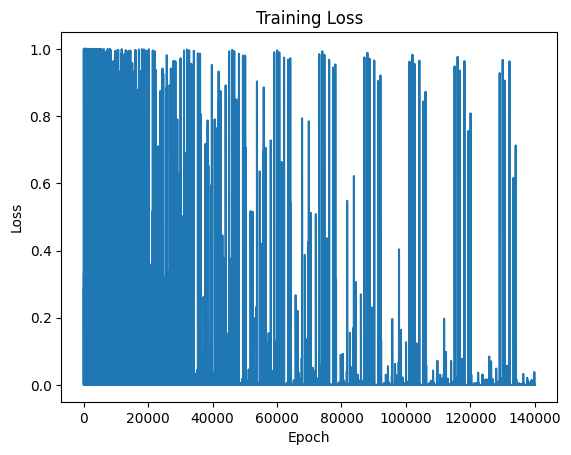

In [43]:
# 二分类
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 设置随机种子以确保可重复性
np.random.seed(0)

# 创建数据集A
n_samples_A = 10000
n_features = 200
mean_A = np.random.rand(n_features)  # 特征均值为随机值
mean_B = -mean_A  # 特征均值为相反数
std_dev = 1.0  # 方差相同

# 生成特征矩阵X_A和X_B，分别服从正态分布
X_A = np.random.normal(mean_A, std_dev, size=(n_samples_A, n_features))
X_B = np.random.normal(mean_B, std_dev, size=(n_samples_A, n_features))

# 为数据集A和B生成相应的标签
y_A = np.zeros(n_samples_A, dtype=int)  # 数据集A的标签为0
y_B = np.ones(n_samples_A, dtype=int)  # 数据集B的标签为1

# 合并数据集并划分为训练集和测试集
X = np.vstack((X_A, X_B))
y = np.hstack((y_A, y_B))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("合并后的训练集 X 维度:", X_train.shape)
print("合并后的测试集 X 维度:", X_test.shape)


# 创建神经网络模型
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate

        self.W1 = np.random.randn(self.input_size, self.hidden_size)
        self.b1 = np.zeros((1, self.hidden_size))
        self.W2 = np.random.randn(self.hidden_size, self.output_size)
        self.b2 = np.zeros((1, self.output_size))

        self.loss_list = []  # 用于保存每次训练后的损失

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward(self, x):
        self.z1 = np.dot(x, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.sigmoid(self.z2)
        return self.a2

    def backward(self, x, y, output):
        self.error = y - output
        self.d_output = self.error * self.sigmoid_derivative(output)
        self.error_hidden = self.d_output.dot(self.W2.T)
        self.d_hidden = self.error_hidden * self.sigmoid_derivative(self.a1)
        self.W1 += x.reshape(-1, 1).dot(self.d_hidden) * self.learning_rate
        self.b1 += np.sum(self.d_hidden, axis=0, keepdims=True) * self.learning_rate
        self.W2 += self.a1.T.dot(self.d_output) * self.learning_rate
        self.b2 += np.sum(self.d_output, axis=0, keepdims=True) * self.learning_rate

    def train(self, x, y):
        output = self.forward(x)
        self.backward(x, y, output)
        loss = np.mean(np.square(y - output))  # 均方误差损失
        self.loss_list.append(loss)

    def predict(self, x):
        output = self.forward(x)
        return np.round(output)

# 设置超参数
input_size = 200
hidden_size = 256
output_size = 1
learning_rate = 0.01

# 初始化神经网络
model = NeuralNetwork(input_size, hidden_size, output_size, learning_rate)

# 训练模型
num_epochs = 10
for epoch in range(num_epochs):
    for i in range(len(X_train)):
        x = X_train[i]
        y = y_train[i]
        model.train(x, y)
    print(f'Epoch {epoch + 1}, Loss: {model.loss_list[-1]}')

# 测试模型
correct = 0
total = len(X_test)
for i in range(total):
    x = X_test[i]
    y = y_test[i]
    prediction = model.predict(x)
    if prediction == y:
        correct += 1

accuracy = correct / total
print("Accuracy:", accuracy)

# 绘制损失曲线
plt.plot(model.loss_list)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

epoch 1 train loss 2.1576, test loss 1.8776, train acc 0.328, test acc 0.502
epoch 2 train loss 1.5250, test loss 1.2647, train acc 0.573, test acc 0.608
epoch 3 train loss 1.1121, test loss 1.0077, train acc 0.641, test acc 0.650
epoch 4 train loss 0.9299, test loss 0.8847, train acc 0.670, test acc 0.664
epoch 5 train loss 0.8352, test loss 0.8152, train acc 0.692, test acc 0.680
epoch 6 train loss 0.7764, test loss 0.7642, train acc 0.713, test acc 0.713
epoch 7 train loss 0.7333, test loss 0.7265, train acc 0.735, test acc 0.730
epoch 8 train loss 0.6986, test loss 0.6968, train acc 0.752, test acc 0.747
epoch 9 train loss 0.6690, test loss 0.6683, train acc 0.766, test acc 0.761
epoch 10 train loss 0.6439, test loss 0.6459, train acc 0.777, test acc 0.773
epoch 11 train loss 0.6222, test loss 0.6265, train acc 0.787, test acc 0.780
epoch 12 train loss 0.6032, test loss 0.6102, train acc 0.794, test acc 0.785
epoch 13 train loss 0.5868, test loss 0.5949, train acc 0.800, test acc 0

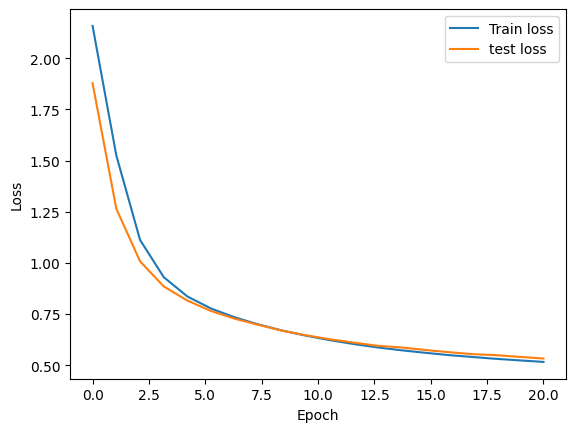

In [45]:
# 多分类
import torch
import torch.nn as nn
import numpy as np
import torchvision
from torchvision import transforms
import matplotlib.pyplot as plt


def draw_loss(train_loss, test_loss):
    x = np.linspace(0, len(train_loss), len(train_loss))
    plt.plot(x, train_loss, label="Train loss", linewidth=1.5)
    plt.plot(x, test_loss, label="test loss", linewidth=1.5)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()


def evaluate_accuracy(data_iter, model, loss_func):
    acc_sum, test_l_sum, n, c = 0.0, 0.0, 0.0, 0.0
    for X, y in data_iter:
        result = model.forward(X)
        acc_sum += (result.argmax(dim=1) == y).float().sum().item()
        test_l_sum += loss_func(result, y).item()
        n += y.shape[0]
        c += 1
    return acc_sum / n, test_l_sum / c


batch_size = 256
# 下载Fashion-MINIST 数据
mnist_train = torchvision.datasets.FashionMNIST(root='./Datasets/FashionMNIST', train=True,
                                                download=True, transform=transforms.ToTensor())
mnist_test = torchvision.datasets.FashionMNIST(root='./Datasets/FashionMNIST', train=False,
                                               download=True, transform=transforms.ToTensor())
# 读取数据
train_iter = torch.utils.data.DataLoader(mnist_train, batch_size=batch_size, shuffle=True,
                                         num_workers=0)
test_iter = torch.utils.data.DataLoader(mnist_test, batch_size=batch_size, shuffle=False,
                                        num_workers=0)


class Net:
    def __init__(self):
        num_input, num_output, num_hiddens = 784, 10, 256
        W1 = torch.tensor(np.random.normal(0, 0.01, (num_hiddens, num_input)), dtype=torch.float)
        b1 = torch.zeros(num_hiddens, dtype=torch.float)
        W2 = torch.tensor(np.random.normal(0, 0.01, (num_output, num_hiddens)), dtype=torch.float)
        b2 = torch.zeros(num_output, dtype=torch.float)
        self.params = [W1, b1, W2, b2]
        for param in self.params:
            param.requires_grad = True

        self.input_layer = lambda x: x.view(x.shape[0], -1)
        self.hiddens_layer = lambda x: self.my_ReLU(torch.matmul(x, W1.t()) + b1)
        self.output_layer = lambda x: torch.matmul(x, W2.t()) + b2

    @staticmethod
    def my_ReLU(x):
        return torch.max(input=x, other=torch.tensor(0.0))

    def forward(self, x):
        flatten_input = self.input_layer(x)
        hidden_output = self.hiddens_layer(flatten_input)
        final_output = self.output_layer(hidden_output)
        return final_output


def my_cross_entropy_loss(y_hat, labels):
    def log_softmax(y_hat):
        max_v, _ = torch.max(y_hat, dim=1)
        return y_hat - max_v.view(-1, 1) - torch.log(torch.sum(torch.exp(y_hat - max_v.view(-1, 1)), dim=1)).view(-1, 1)

    log_probs = log_softmax(y_hat)
    index = torch.arange(0, len(y_hat))

    return -log_probs[index, labels].mean()


def SGD(params, lr):
    for param in params:
        param.data -= lr * param.grad


def train(net, train_iter, loss_func, num_epochs, lr=None, optimizer=None):
    train_loss_list = []
    test_loss_list = []
    for epoch in range(num_epochs):
        train_l_sum, train_acc_sum, n, c = 0.0, 0.0, 0, 0
        for X, y in train_iter:
            y_hat = net.forward(X)
            l = loss_func(y_hat, y)
            l.backward()
            optimizer(net.params, lr)
            for param in net.params:
                param.grad.data.zero_()
            train_l_sum += l.item()
            train_acc_sum += (y_hat.argmax(dim=1) == y).sum().item()
            n += y.shape[0]
            c += 1
        test_acc, test_loss = evaluate_accuracy(test_iter, net, loss_func)
        train_loss_list.append(train_l_sum / c)
        test_loss_list.append(test_loss)
        print('epoch %d train loss %.4f, test loss %.4f, train acc %.3f, test acc %.3f'
              % (epoch + 1, train_l_sum / c, test_loss, train_acc_sum / n, test_acc))
    return train_loss_list, test_loss_list


net = Net()
num_epoch = 20
lr = 0.01
optimizer = SGD

loss = my_cross_entropy_loss

train_loss, test_loss = train(net, train_iter, loss, num_epoch, lr, optimizer)

draw_loss(train_loss, test_loss)

## 1.3 实验结果分析

> 本部分位置灵活，若结果位于`实验代码`中，则可在输出结果后添加本部分。请注意如下几点：
> 1. 添加本部分的位置应添加`## 实验结果分析`二级标题；
> 2. 对比不同参数性能时至少要有三组参数以提高说服力；
> 3. 不能只有图或表而没有文字分析；
> 4. 避免在没有给出证明的情况下使用“完美”、“完全”、“消除”、“彻底”等绝对表述；
> 5. **应对贴出的图和表进行描述（如趋势等），同时分析出现相关现象的原因**。

---

# 二、任务2

## 2.1 任务内容

1. 利用torch.nn实现前馈神经网络解决上述回归、二分类、多分类任务
2. 在多分类实验的基础上使用至少三种不同的激活函数

## 2.2 任务思路及代码

1. 步骤1：生成数据集
2. 步骤2：模型训练
3. 步骤3：绘制图表

训练集 X 维度: (7000, 500)
测试集 X 维度: (3000, 500)
训练集 X 维度: (7000, 500)
测试集 X 维度: (3000, 500)


C:\Users\苍山沐雪\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([7000])) that is different to the input size (torch.Size([7000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 1/20, Loss: 1.0716
Epoch 2/20, Loss: 1.0122
Epoch 3/20, Loss: 0.9978
Epoch 4/20, Loss: 0.9942
Epoch 5/20, Loss: 0.9933
Epoch 6/20, Loss: 0.9931
Epoch 7/20, Loss: 0.9930
Epoch 8/20, Loss: 0.9930
Epoch 9/20, Loss: 0.9930
Epoch 10/20, Loss: 0.9930
Epoch 11/20, Loss: 0.9930
Epoch 12/20, Loss: 0.9930
Epoch 13/20, Loss: 0.9929
Epoch 14/20, Loss: 0.9929
Epoch 15/20, Loss: 0.9929
Epoch 16/20, Loss: 0.9929
Epoch 17/20, Loss: 0.9929
Epoch 18/20, Loss: 0.9929
Epoch 19/20, Loss: 0.9929
Epoch 20/20, Loss: 0.9929


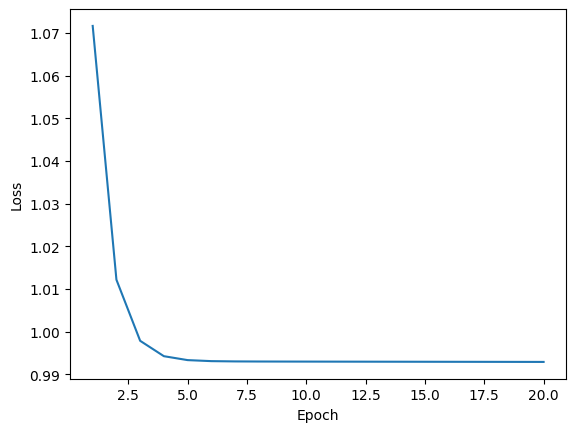

In [10]:
# 回归
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Generate your regression dataset (X, y) here
# 设置随机种子以确保可重复性
np.random.seed(0)

# 生成特征矩阵 X，大小为 (10000, 500)
n_samples = 10000
n_features = 500
X = np.random.rand(n_samples, n_features)

# 生成噪声项 E，假设服从均值为0、标准差为1的正态分布
E = np.random.normal(0, 1, n_samples)

# 计算目标值 y，根据给定线性函数 y = 0.028 + 0.056 * X_i + E
# 其中，X_i 为特征矩阵 X 的第 i 列特征
y = 0.028 + 0.056 * X[:, 0] + E

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 打印数据集维度
print("训练集 X 维度:", X_train.shape)
print("测试集 X 维度:", X_test.shape)

# 设置随机种子以确保可重复性
np.random.seed(0)

# 生成特征矩阵 X，大小为 (10000, 500)
n_samples = 10000
n_features = 500
X = np.random.rand(n_samples, n_features)

# 生成噪声项 E，假设服从均值为0、标准差为1的正态分布
E = np.random.normal(0, 1, n_samples)

# 计算目标值 y，根据给定线性函数 y = 0.028 + 0.056 * X_i + E
# 其中，X_i 为特征矩阵 X 的第 i 列特征
y = 0.028 + 0.056 * X[:, 0] + E

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 打印数据集维度
print("训练集 X 维度:", X_train.shape)
print("测试集 X 维度:", X_test.shape)

# Convert data to PyTorch tensors
X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).float()
X_test = torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test).float()

# Define a custom neural network for regression using nn.Module
class RegressionNet(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(RegressionNet, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, X):
        x = self.fc1(X)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Create the regression model
input_dim = n_features
hidden_dim = 256
output_dim = 1
regression_model = RegressionNet(input_dim, hidden_dim, output_dim)

# Define the loss function
loss_func = nn.MSELoss()

# Define the optimizer
optimizer = torch.optim.SGD(regression_model.parameters(), lr=0.01)

# Training parameters
num_epochs = 20

# Training loop
train_losses = []

for epoch in range(num_epochs):
    regression_model.train()
    y_pred = regression_model(X_train)
    loss = loss_func(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())
    print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {loss.item():.4f}')

# Plot the loss curve
plt.plot(range(1, num_epochs + 1), train_losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()



Epoch 1, Loss: 0.789317786693573
Epoch 2, Loss: 0.7237209677696228
Epoch 3, Loss: 0.6657575368881226
Epoch 4, Loss: 0.6143518686294556
Epoch 5, Loss: 0.5686010718345642
Epoch 6, Loss: 0.5277352333068848
Epoch 7, Loss: 0.49110913276672363
Epoch 8, Loss: 0.45817333459854126
Epoch 9, Loss: 0.4284588396549225
Epoch 10, Loss: 0.4015673100948334
Epoch 11, Loss: 0.3771589994430542
Epoch 12, Loss: 0.3549438714981079
Epoch 13, Loss: 0.33467134833335876
Epoch 14, Loss: 0.3161247670650482
Epoch 15, Loss: 0.2991167902946472
Epoch 16, Loss: 0.28348687291145325
Epoch 17, Loss: 0.26909226179122925
Epoch 18, Loss: 0.2558083236217499
Epoch 19, Loss: 0.2435249537229538
Epoch 20, Loss: 0.2321455180644989


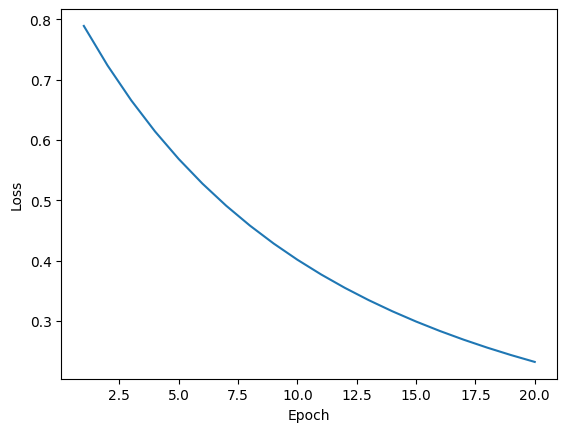

Accuracy on the test set: 100.00%


C:\Users\苍山沐雪\AppData\Local\Temp\ipykernel_5684\3881969852.py:81: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test = torch.tensor(X_test, dtype=torch.float)
C:\Users\苍山沐雪\AppData\Local\Temp\ipykernel_5684\3881969852.py:82: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test = torch.tensor(y_test, dtype=torch.int64)


In [33]:
# 二分类
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 创建数据集A和B（二分类任务）
n_samples = 10000
n_features = 200
mean_A = np.random.rand(n_features)
mean_B = -mean_A
std_dev = 1.0

X_A = np.random.normal(mean_A, std_dev, size=(n_samples, n_features))
X_B = np.random.normal(mean_B, std_dev, size=(n_samples, n_features))

y_A = np.zeros(n_samples, dtype=int)  # 类别A的标签为0
y_B = np.ones(n_samples, dtype=int)   # 类别B的标签为1

# 合并数据集A和数据集B
X = np.vstack((X_A, X_B))
y = np.concatenate((y_A, y_B))

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 转换数据为PyTorch张量
X_train = torch.tensor(X_train, dtype=torch.float)
y_train = torch.tensor(y_train, dtype=torch.int64)

X_test = torch.tensor(X_test, dtype=torch.float)
y_test = torch.tensor(y_test, dtype=torch.int64)

# 创建神经网络模型
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(200, 256)
        self.fc2 = nn.Linear(256, 2)  # 输出层有2个单元，对应二分类任务

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# 训练模型
def train(net, X_train, y_train, num_epochs, lr):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(net.parameters(), lr=lr)

    train_loss_list = []

    for epoch in range(num_epochs):
        optimizer.zero_grad()
        outputs = net(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()
        train_loss_list.append(loss.item())

        print(f'Epoch {epoch + 1}, Loss: {loss.item()}')

    return train_loss_list

# 创建并训练模型
net = Net()
num_epochs = 20
learning_rate = 0.01

train_loss = train(net, X_train, y_train, num_epochs, learning_rate)

# 绘制损失曲线
plt.plot(range(1, num_epochs + 1), train_loss)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# 在测试集上评估模型
X_test = torch.tensor(X_test, dtype=torch.float)
y_test = torch.tensor(y_test, dtype=torch.int64)

with torch.no_grad():
    outputs = net(X_test)
    _, predicted = torch.max(outputs, 1)
    accuracy = (predicted == y_test).sum().item() / y_test.size(0)

print(f'Accuracy on the test set: {accuracy * 100:.2f}%')


Epoch 1, Train loss: 1.7535, Test loss: 1.2976, Train acc: 0.571, Test acc: 0.649
Epoch 2, Train loss: 1.0809, Test loss: 0.9501, Train acc: 0.667, Test acc: 0.676
Epoch 3, Train loss: 0.8684, Test loss: 0.8230, Train acc: 0.700, Test acc: 0.703
Epoch 4, Train loss: 0.7733, Test loss: 0.7510, Train acc: 0.734, Test acc: 0.736
Epoch 5, Train loss: 0.7143, Test loss: 0.7024, Train acc: 0.757, Test acc: 0.756
Epoch 6, Train loss: 0.6714, Test loss: 0.6668, Train acc: 0.774, Test acc: 0.767
Epoch 7, Train loss: 0.6379, Test loss: 0.6380, Train acc: 0.787, Test acc: 0.779
Epoch 8, Train loss: 0.6120, Test loss: 0.6156, Train acc: 0.797, Test acc: 0.788
Epoch 9, Train loss: 0.5900, Test loss: 0.5950, Train acc: 0.805, Test acc: 0.794
Epoch 10, Train loss: 0.5716, Test loss: 0.5809, Train acc: 0.809, Test acc: 0.798
Epoch 11, Train loss: 0.5566, Test loss: 0.5680, Train acc: 0.814, Test acc: 0.802
Epoch 12, Train loss: 0.5437, Test loss: 0.5563, Train acc: 0.819, Test acc: 0.807
Epoch 13, Tra

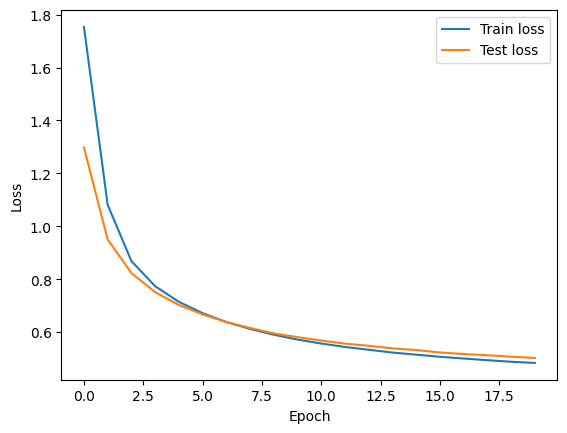

In [47]:
# 多分类
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt


def draw_loss(train_loss, test_loss):
    x = range(len(train_loss))
    plt.plot(x, train_loss, label="Train loss", linewidth=1.5)
    plt.plot(x, test_loss, label="Test loss", linewidth=1.5)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()


# Define the neural network using nn.Module
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        num_input, num_output, num_hiddens = 784, 10, 256
        self.fc1 = nn.Linear(num_input, num_hiddens)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(num_hiddens, num_output)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x


def train(net, train_loader, test_loader, loss_func, optimizer, num_epochs):
    train_loss_list = []
    test_loss_list = []

    for epoch in range(num_epochs):
        net.train()
        train_l_sum, train_acc_sum, n, c = 0.0, 0.0, 0, 0
        for X, y in train_loader:
            y_hat = net(X)
            l = loss_func(y_hat, y)
            optimizer.zero_grad()
            l.backward()
            optimizer.step()
            train_l_sum += l.item()
            train_acc_sum += (y_hat.argmax(dim=1) == y).sum().item()
            n += y.shape[0]
            c += 1
        test_loss, test_acc = evaluate_accuracy(net, test_loader, loss_func)
        train_loss_list.append(train_l_sum / c)
        test_loss_list.append(test_loss)
        print(
            f'Epoch {epoch + 1}, Train loss: {train_l_sum / c:.4f}, Test loss: {test_loss:.4f}, Train acc: {train_acc_sum / n:.3f}, Test acc: {test_acc:.3f}')

    return train_loss_list, test_loss_list


def evaluate_accuracy(model, data_loader, loss_func):
    model.eval()
    acc_sum, test_l_sum, n, c = 0.0, 0.0, 0, 0
    with torch.no_grad():
        for X, y in data_loader:
            y_hat = model(X)
            acc_sum += (y_hat.argmax(dim=1) == y).float().sum().item()
            test_l_sum += loss_func(y_hat, y).item()
            n += y.shape[0]
            c += 1
    return test_l_sum / c, acc_sum / n


# Hyperparameters
batch_size = 256
num_epochs = 20
lr = 0.01

# Load the Fashion-MNIST dataset
mnist_train = torchvision.datasets.FashionMNIST(root='./datasets/FashionMNIST', train=True,
                                                download=True, transform=transforms.ToTensor())
mnist_test = torchvision.datasets.FashionMNIST(root='./datasets/FashionMNIST', train=False,
                                               download=True, transform=transforms.ToTensor())

train_loader = DataLoader(mnist_train, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(mnist_test, batch_size=batch_size, shuffle=False)

# Create the model
net = Net()

# Define the loss function and optimizer
loss_func = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=lr)

# Train the model
train_loss, test_loss = train(net, train_loader, test_loader, loss_func, optimizer, num_epochs)

# Plot the loss curves
draw_loss(train_loss, test_loss)

## 2.3 实验结果分析

> 本部分位置灵活，若结果位于`实验代码`中，则可在输出结果后添加本部分。请注意如下几点：
> 1. 添加本部分的位置应添加`## 实验结果分析`二级标题；
> 2. 对比不同参数性能时至少要有三组参数以提高说服力；
> 3. 不能只有图或表而没有文字分析；
> 4. 避免在没有给出证明的情况下使用“完美”、“完全”、“消除”、“彻底”等绝对表述；
> 5. **应对贴出的图和表进行描述（如趋势等），同时分析出现相关现象的原因**。

---

---

# A1 实验心得

> 1. 请重视总结心得体会，该部分计分；
> 2. 至少应包括一个具体任务心得或代码排错过程，而不是仅有诸如“学到了很多”的内容。

# A2 参考文献

> 主要包含实验过程中涉及到的参考资料或者借鉴别人的材料等，如果没有可以不写。

1. 参考文献1；
2. 参考文献2；
3. ……